In [ ]:
import ipywidgets as widgets
widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Slider:',
    value=3
)

In [ ]:
from IPython.display import display
slider = widgets.IntSlider()
display(slider)

In [ ]:
slider = widgets.IntSlider()
text = widgets.IntText()
display(slider, text)
widgets.jslink((slider, 'value'), (text, 'value'))

In [ ]:
print(dir(widgets))

In [ ]:
btn = widgets.Button(description='Medium')
display(btn)
def btn_eventhandler(obj):
    print('Hello from the {} button!'.format(obj.description))
btn.on_click(btn_eventhandler)

In [ ]:
import pandas as pd
import numpy as np
df_london = pd.read_csv("international-visitors-london-raw.csv")

In [ ]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [ ]:
dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_london.year))
output_year = widgets.Output()
def dropdown_year_eventhandler(change):
    output_year.clear_output()
    with output_year:
        if (change.new == ALL):
            display(df_london)
        else:
            display(df_london[df_london.year == change.new])
dropdown_year.observe(dropdown_year_eventhandler, names='value')
display(dropdown_year)
display(output_year)

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
overall_stats = pd.read_csv('ml-latest-small/ratings.csv')
overall_stats.head()

In [ ]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [ ]:
items_dataset = pd.read_csv('ml-latest-small/movies.csv')

dropdown_genres = widgets.Dropdown(options = unique_sorted_values_plus_ALL(items_dataset.genres),description = "Genres:")
output_year = widgets.Output()
output_genres = widgets.Output()

def dropdown_genres_eventhandler(change):
    output_genres.clear_output()
    with output_genres:
        if (change.new == ALL):
            display(items_dataset)
        else:
            display(items_dataset[items_dataset.genres == change.new])
dropdown_genres.observe(dropdown_genres_eventhandler, names='value')
display(dropdown_genres)
display(output_genres)

In [ ]:
items_dataset

In [ ]:
movie_dataset = items_dataset[['movieId','title']]
movie_dataset

In [ ]:
merged_dataset = pd.merge(overall_stats, movie_dataset, how='inner', on='movieId')
merged_dataset.head()

In [ ]:
merged_dataset.describe()

# Data Visualization & Recommendations through Data Analysis for a new user (Content-based & Popularity based Recommender system)

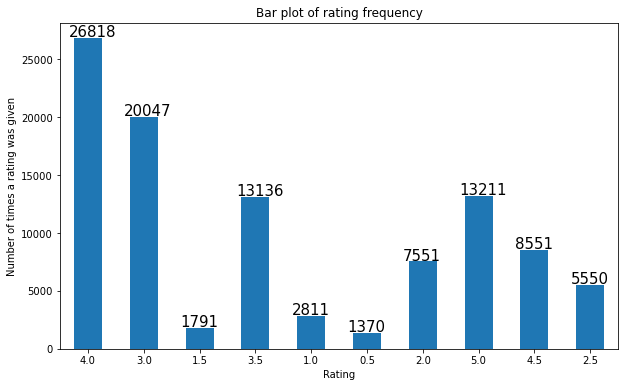

In [185]:
merged_dataset['rating'].value_counts(sort=False).plot(kind='bar' ,figsize=(10,6), use_index = True, rot=0)
plt.title('Bar plot of rating frequency')
plt.xlabel('Rating')
plt.ylabel('Number of times a rating was given')
label = list(merged_dataset['rating'].value_counts(sort=False))
r4 = [1,2,3,4,5,6,7,8,9,10]
for i in range(len(label)):
    plt.text(x = r4[i]-1.35 , y = label[i]+120, s = label[i], size =15)

We can observe that most of the users have rewarded movies they watched with a 4 star rating and followed by 3 star and 5 star.

In [186]:
avg_highly_rated_movies = merged_dataset.groupby(['title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_highly_rated_movies = avg_highly_rated_movies.to_frame()

In [187]:
avg_highly_rated_movies.head(20)

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
"Thin Line Between Love and Hate, A (1996)",5.0
Lesson Faust (1994),5.0
Eva (2011),5.0
Who Killed Chea Vichea? (2010),5.0


In [188]:
print("Number of movies with 5 star rating on average: ",len(avg_highly_rated_movies[avg_highly_rated_movies['rating'] == 5.0]))
print("Number of movies with above 4 star and below 5 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 4.0) & (avg_highly_rated_movies['rating'] < 5.0)]))
print("Number of movies with above 3 star and below 4 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 3.0) & (avg_highly_rated_movies['rating'] < 4.0)]))
print("Number of movies with above 2 star and below 3 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 2.0) & (avg_highly_rated_movies['rating'] < 3.0)]))
print("Number of movies with above 1 star and below 2 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 1.0) & (avg_highly_rated_movies['rating'] < 2.0)]))
print("Number of movies with below 1 star rating on average: ", len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] < 1.0)]))

Number of movies with 5 star rating on average:  296
Number of movies with above 4 star and below 5 star rating on average:  1972
Number of movies with above 3 star and below 4 star rating on average:  4694
Number of movies with above 2 star and below 3 star rating on average:  2121
Number of movies with above 1 star and below 2 star rating on average:  528
Number of movies with below 1 star rating on average:  108


Split of movies count based on their overall average rating


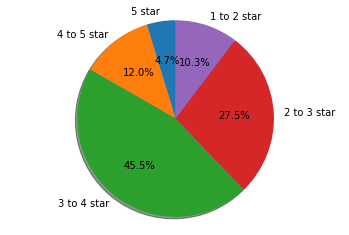

In [189]:
import matplotlib.pyplot as plt
print('Split of movies count based on their overall average rating')
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '5 star', '4 to 5 star', '3 to 4 star', '2 to 3 star', '1 to 2 star'
sizes = [100, 253, 961, 582, 218]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [190]:
avg_highly_rated_movies.reset_index(level=0, inplace=True)

In [191]:
avg_highly_rated_movies.columns = ['title', 'avg rating']

avg_highly_rated_movies.head(10)

,title,avg rating
0,Gena the Crocodile (1969),5.0
1,True Stories (1986),5.0
2,Cosmic Scrat-tastrophe (2015),5.0
3,Love and Pigeons (1985),5.0
4,Red Sorghum (Hong gao liang) (1987),5.0
5,"Thin Line Between Love and Hate, A (1996)",5.0
6,Lesson Faust (1994),5.0
7,Eva (2011),5.0
8,Who Killed Chea Vichea? (2010),5.0
9,Siam Sunset (1999),5.0


These are the top 10 movies that can be naviely suggested to the new users, Recommendations based on top average ratings.

In [192]:
merged_dataset.groupby(['title']).agg({"rating":"sum"})['rating'].sort_values(ascending=False)

title
Shawshank Redemption, The (1994)    1404.0
Forrest Gump (1994)                 1370.0
Pulp Fiction (1994)                 1288.5
Matrix, The (1999)                  1165.5
Silence of the Lambs, The (1991)    1161.0
                                     ...  
Uncle Nino (2003)                      0.5
Legionnaire (1998)                     0.5
Ring of Terror (1962)                  0.5
Glitter (2001)                         0.5
Begotten (1990)                        0.5
Name: rating, Length: 9719, dtype: float64

In [193]:
popular_movies = merged_dataset.groupby(['title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)

In [194]:
popular_movies = popular_movies.to_frame()
popular_movies.reset_index(level=0, inplace=True)
popular_movies.columns = ['Movie title', 'Number of Users watched']

In [195]:
print("Number of popular movies with more than 300 and less than 400 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 300) & (popular_movies['Number of Users watched'] < 400)]))
print("Number of popular movies with more than 200 and less than 300 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 200) & (popular_movies['Number of Users watched'] < 300)]))
print("Number of popular movies with more than 100 and less than 200 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 100) & (popular_movies['Number of Users watched'] < 200)]))
print("Number of popular movies with less than 100 viewers: ", len(popular_movies[(popular_movies['Number of Users watched'] < 100)]))

Number of popular movies with more than 300 and less than 400 viewers:  3
Number of popular movies with more than 200 and less than 300 viewers:  16
Number of popular movies with more than 100 and less than 200 viewers:  119
Number of popular movies with less than 100 viewers:  9581


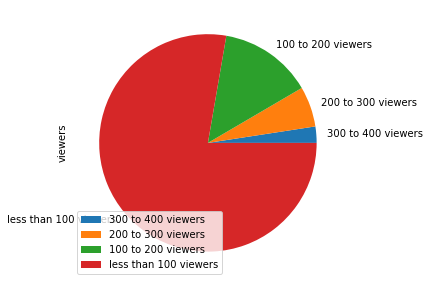

In [196]:
df = pd.DataFrame({'viewers': [42, 104, 240, 1346]},
                  index=['300 to 400 viewers', '200 to 300 viewers', '100 to 200 viewers', 'less than 100 viewers'])
plot = df.plot.pie(y='viewers', figsize=(5, 5))

In [197]:
popular_movies[popular_movies['Number of Users watched'] >= 200]

,Movie title,Number of Users watched
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
5,Star Wars: Episode IV - A New Hope (1977),251
6,Jurassic Park (1993),238
7,Braveheart (1995),237
8,Terminator 2: Judgment Day (1991),224
9,Schindler's List (1993),220
